In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print('Is there any missing value present or not?',data.isnull().values.any())
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Is there any missing value present or not? True


,missing_count,missing_percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


In [78]:
data = data.drop(['car','toCoupon_GEQ5min'],axis = 1)

## Missing value imputation

In [7]:
# mode imputation for missing values in data
data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

## Remove duplicates

In [8]:
duplicate = data[data.duplicated(keep = 'last')]
data = data.drop_duplicates()
print("Shape of dataset after removing duplicates:",data.shape)

Shape of dataset after removing duplicates: (12610, 26)


## Distribution of Classes

In [9]:
y_counts = data.groupby('Y').Y.count()
print("Accepted coupon:", y_counts[1],round(y_counts[1]/data.shape[0]*100,3),'%')
print("Rejected coupon:", y_counts[0],round(y_counts[0]/data.shape[0]*100,3),'%')

Accepted coupon: 7157 56.757 %
Rejected coupon: 5453 43.243 %


# EDA

<Axes: ylabel='temperature'>

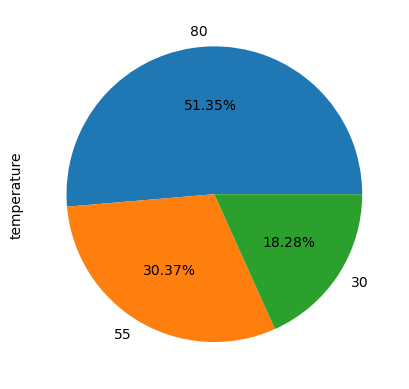

In [10]:
data.temperature.value_counts().plot(kind='pie',autopct='%0.2f%%')

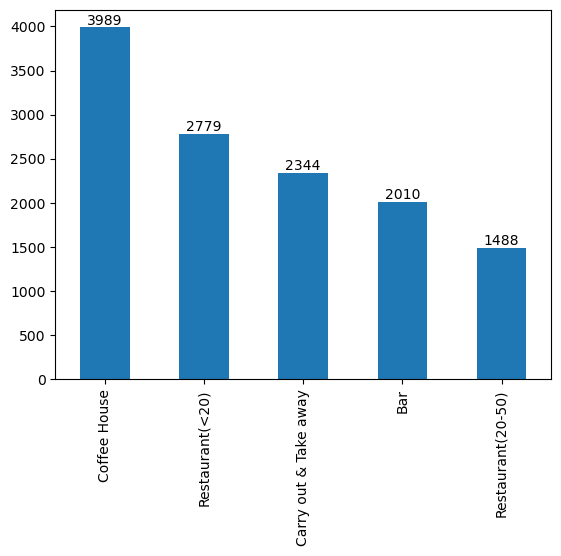

In [11]:
# Coupon distribution
ax=data.coupon.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [12]:
# Income Category-wise Accepted Coupons
pivoted_data = data.pivot_table(index = 'income',columns = 'Y',aggfunc='size',fill_value=0)

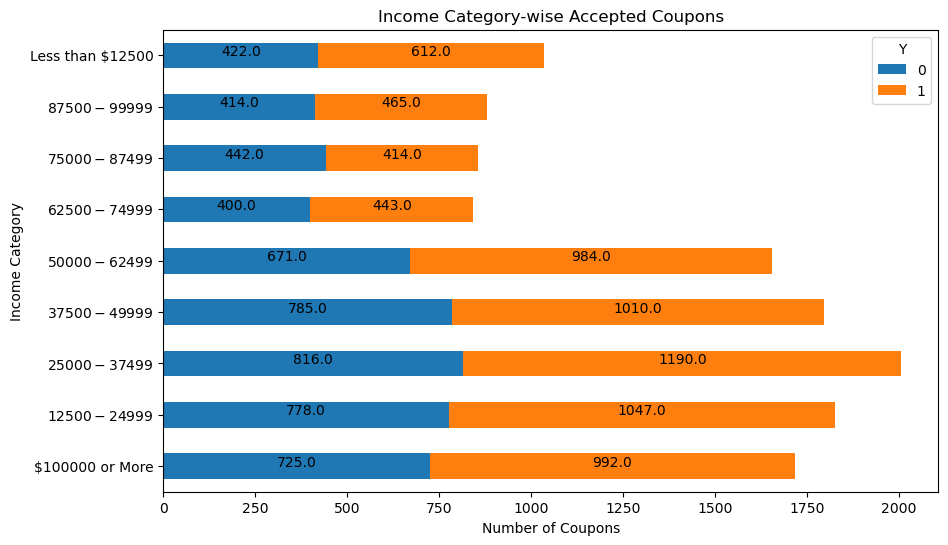

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
pivoted_data.plot(kind='barh',stacked=True,ax=ax)
ax.set_xlabel("Number of Coupons")
ax.set_ylabel("Income Category")
ax.set_title("Income Category-wise Accepted Coupons")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(f'{width}', (x+width/2, y+height/2), ha = 'center')

    
plt.show()

<Figure size 2000x800 with 0 Axes>

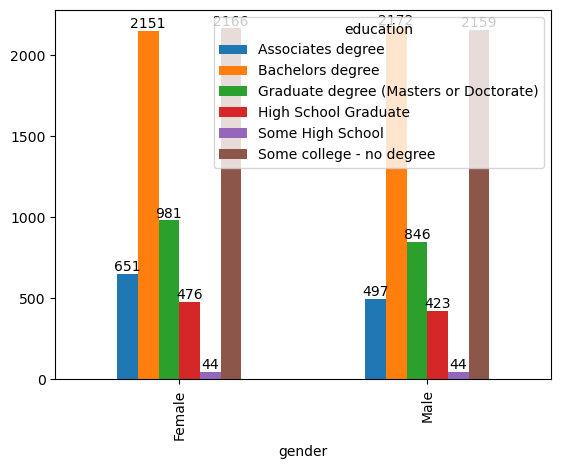

In [14]:
# Gender education counts
plt.figure(figsize=(20,8))
ax = pd.crosstab(data.gender,data.education).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

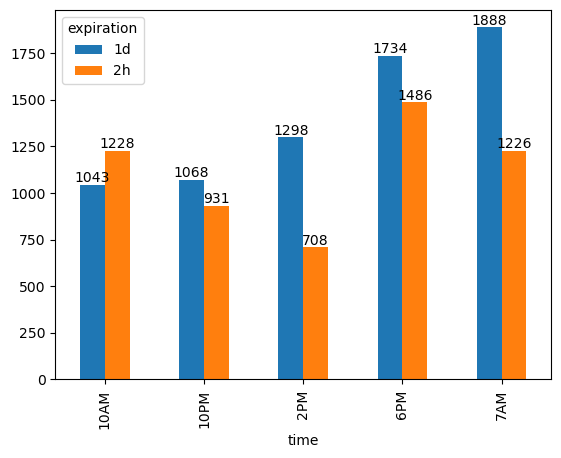

In [15]:
ax=pd.crosstab(data.time,data.expiration).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

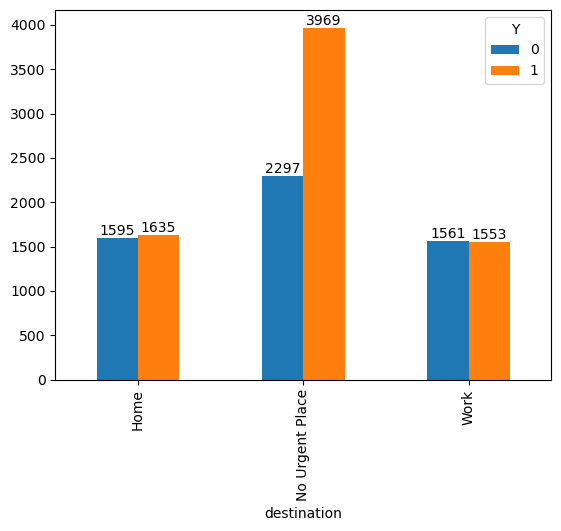

In [27]:
ax = pd.crosstab(data.destination, data.Y).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

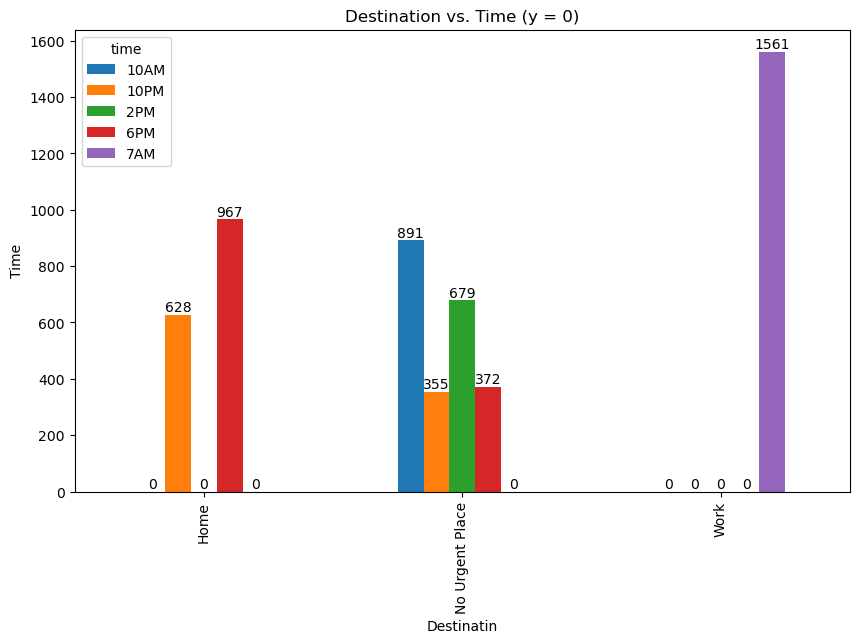

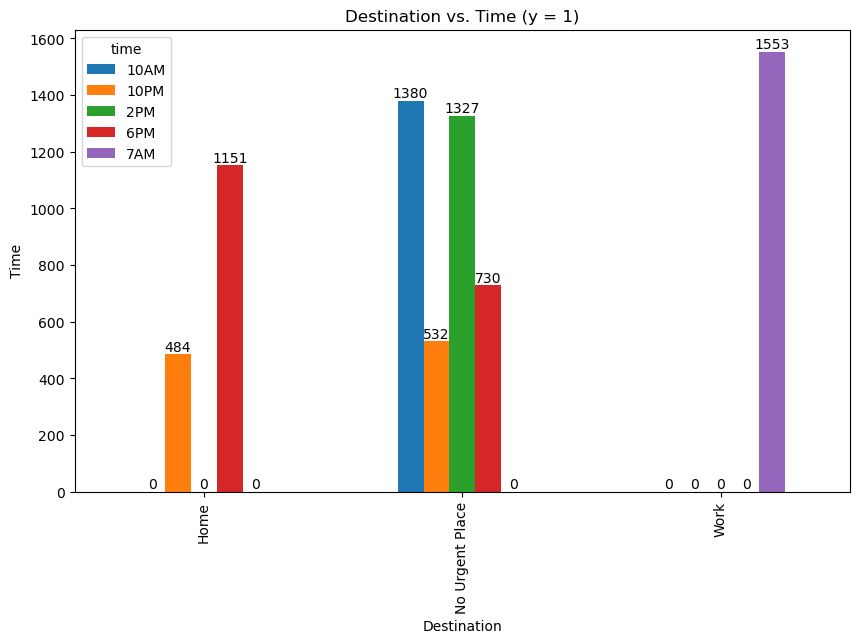

In [30]:
df_y_0 = data[data['Y'] == 0]
df_y_1 = data[data['Y'] == 1]


dest_cust_y_0 = pd.crosstab(df_y_0.destination,df_y_0.time)
ax = dest_cust_y_0.plot(kind='bar',figsize=(10,6))
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Destinatin')
plt.ylabel('Time')
plt.title('Destination vs. Time (y = 0)')
plt.show()

dest_cust_y_1 = pd.crosstab(df_y_1.destination,df_y_1.time)
ax = dest_cust_y_1.plot(kind='bar',figsize=(10,6))
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Destination')
plt.ylabel('Time')
plt.title('Destination vs. Time (y = 1)')
plt.show()

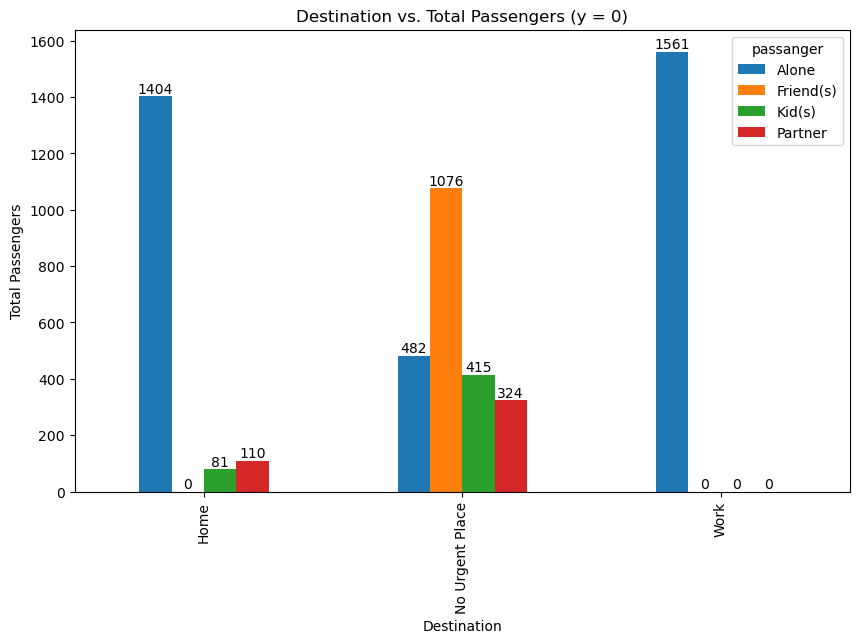

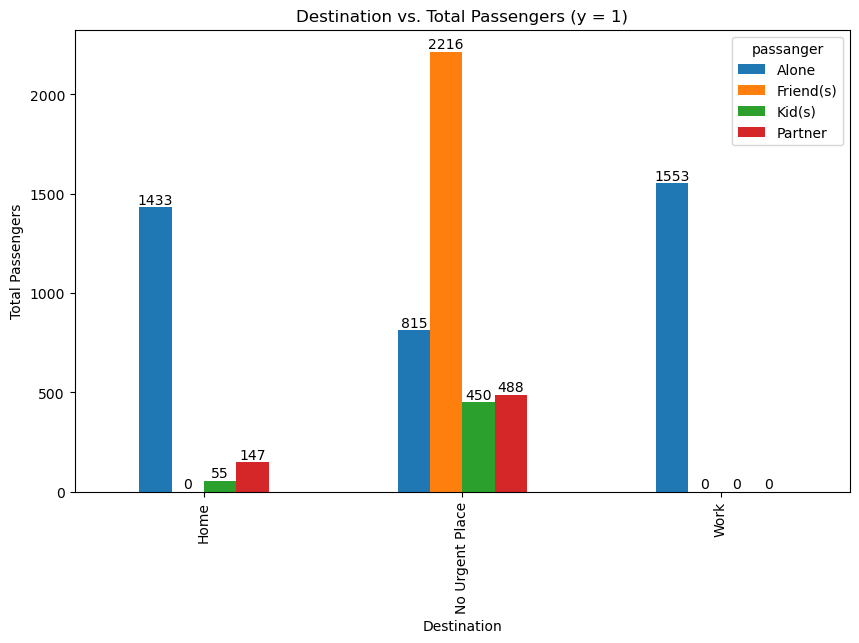

In [23]:
df_y_0 = data[data['Y'] == 0]
df_y_1 = data[data['Y'] == 1]

# Create a bar plot of destination vs. passengers for y = 0
destination_passengers_y_0 = pd.crosstab(df_y_0.destination, df_y_0.passanger)
ax = destination_passengers_y_0.plot(kind='bar', figsize=(10, 6))
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Destination')
plt.ylabel('Total Passengers')
plt.title('Destination vs. Total Passengers (y = 0)')
plt.show()

# Create a bar plot of destination vs. passengers for y = 1
destination_passengers_y_1 = pd.crosstab(df_y_1.destination, df_y_1.passanger)
ax = destination_passengers_y_1.plot(kind='bar', figsize=(10, 6))
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Destination')
plt.ylabel('Total Passengers')
plt.title('Destination vs. Total Passengers (y = 1)')
plt.show()

In [31]:
# The users who go with Friends have only No Urgent Place destination.
# At 7 AM, only working users are going out Alone and also at 2 PM and 10 AM Users only go to No Urgent Place.
# Maximum users accept coupons when the time is 2PM and 10AM, the destination is No Urgent Place,and the co-passanger is Friends
# The users who have destination Home and Work have almost similar coupon acceptance ratios.

###  At what time, which coupon acceptance and rejection ratio is high?

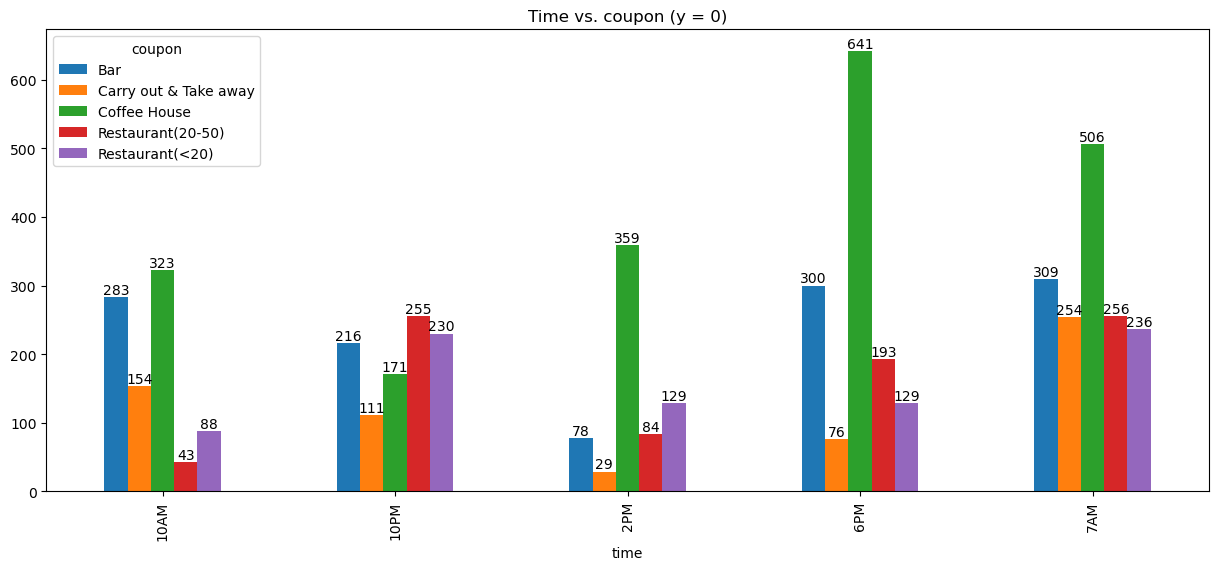

In [44]:
ax = pd.crosstab(df_y_0.time,df_y_0.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Time vs. coupon (y = 0)')
plt.show()

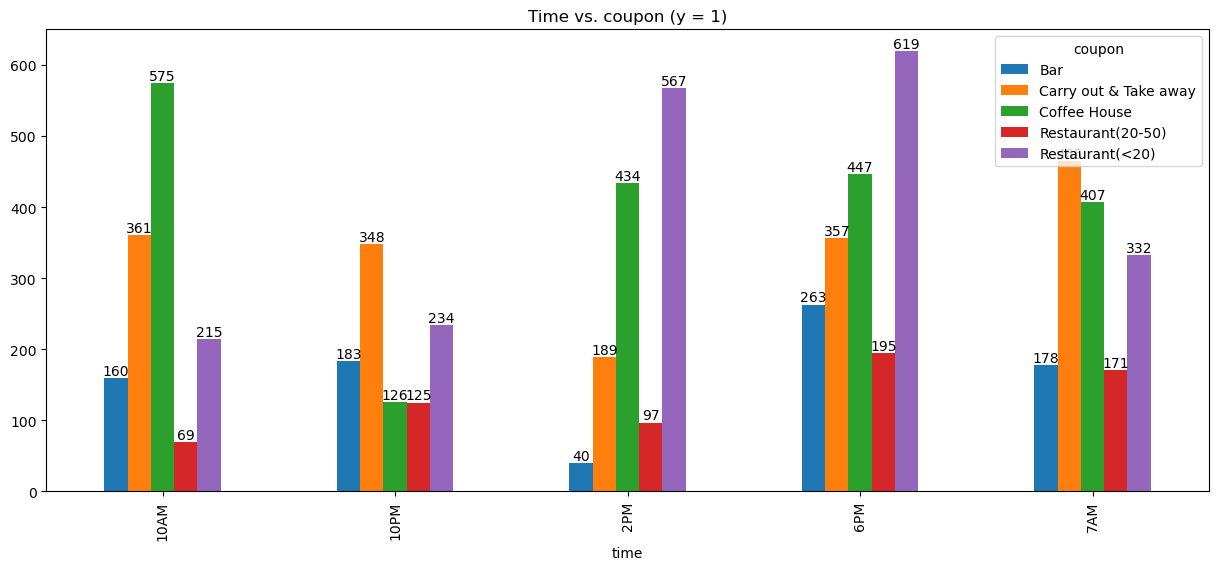

In [43]:
ax = pd.crosstab(df_y_1.time,df_y_1.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Time vs. coupon (y = 1)')
plt.show()

<Axes: xlabel='temperature'>

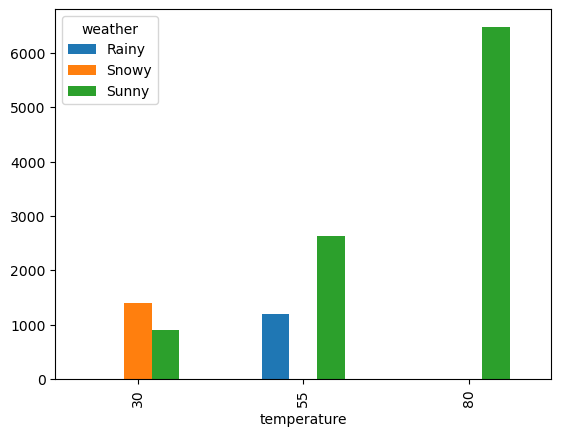

In [47]:
# Bivariate Analysis of weather and temperature
pd.crosstab(data.temperature,data.weather).plot(kind='bar')

### Bivariate Analysis of Coupon type and its Expiration.

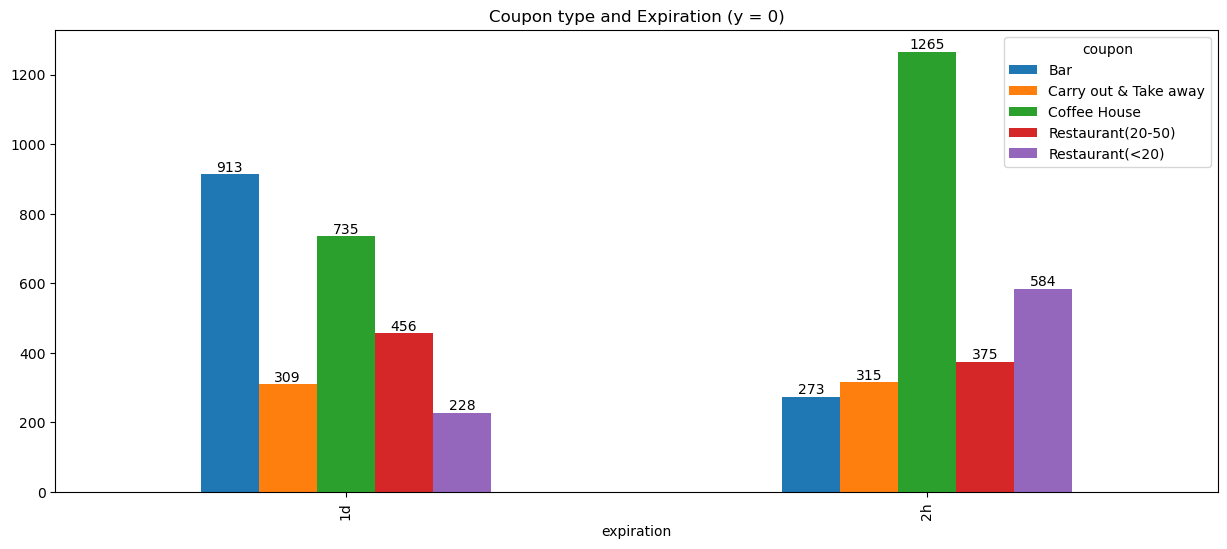

In [62]:
ax = pd.crosstab(df_y_0.expiration,df_y_0.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Coupon type and Expiration (y = 0)')
plt.show()

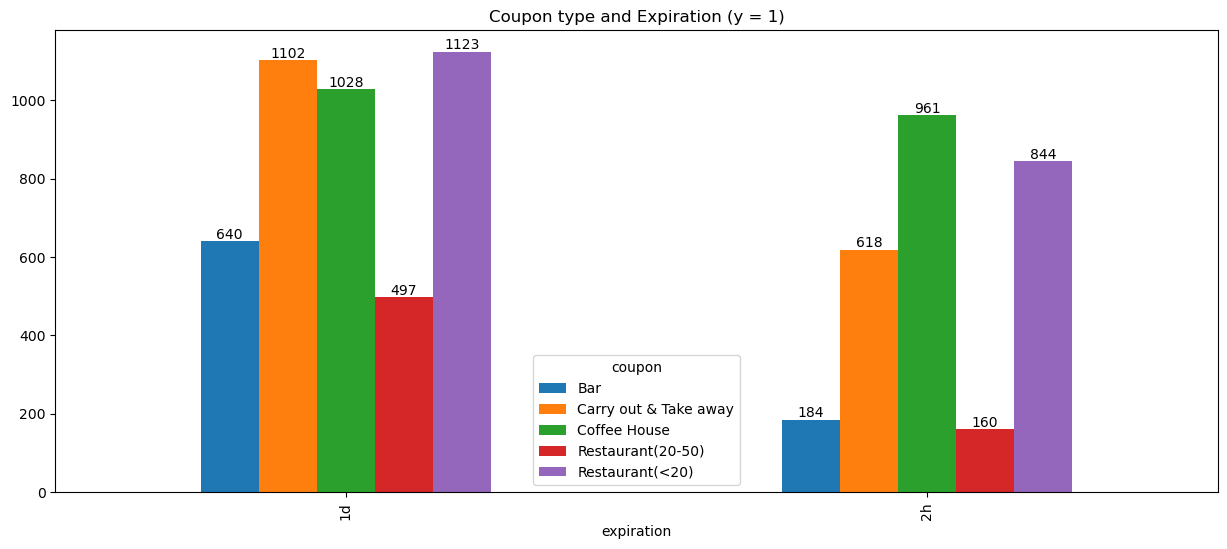

In [61]:
ax = pd.crosstab(df_y_1.expiration,df_y_1.coupon).plot(kind='bar',figsize=(15,6))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Coupon type and Expiration (y = 1)')
plt.show()

In [ ]:
# Most Users prefer to accept 1d expiration coupons than 2h expiration coupons.
# Also, Users mostly accept the 1d expiration of Restaurant(<20), Carry out & Take away, and coffee house coupons.
# Users mainly do not prefer to accept expensive Restaurant and bar coupons with a low expiration time (2h).

# Hypothesis Testing

In [64]:
pd.crosstab(data.gender,data.education)

education,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree
gender,,,,,,
Female,651,2151,981,476,44,2166
Male,497,2172,846,423,44,2159


In [65]:
pd.crosstab(data.time,data.expiration)

expiration,1d,2h
time,,
10AM,1043,1228
10PM,1068,931
2PM,1298,708
6PM,1734,1486
7AM,1888,1226


In [66]:
pd.crosstab(data.coupon,data.expiration)

expiration,1d,2h
coupon,,
Bar,1553,457
Carry out & Take away,1411,933
Coffee House,1763,2226
Restaurant(20-50),953,535
Restaurant(<20),1351,1428


In [67]:
from scipy.stats import chi2_contingency

In [68]:
chi2_contingency(pd.crosstab(data.coupon,data.time))
# since pvalue=3.113410985751833e-219 is leassthan 0.05, reject null hypothesis

Chi2ContingencyResult(statistic=1077.2833300199384, pvalue=3.113410985751833e-219, dof=16, expected_freq=array([[ 361.99127676,  318.63521015,  319.75099128,  513.259318  ,
         496.36320381],
       [ 422.14306106,  371.58255353,  372.88374306,  598.54718477,
         578.84345757],
       [ 718.39960349,  632.35614592,  634.5704996 , 1018.60269627,
         985.07105472],
       [ 267.9816019 ,  235.8851705 ,  236.7111816 ,  379.96510706,
         367.45693894],
       [ 500.48445678,  440.5409199 ,  442.08358446,  709.62569389,
         686.26534496]]))

In [70]:
chi2_contingency(pd.crosstab(data.coupon,data.expiration))
# since pvalue=1.7480084109383897e-152 is lessthan 0.05, reject null hypothesis

Chi2ContingencyResult(statistic=710.6205178224469, pvalue=1.7480084109383897e-152, dof=4, expected_freq=array([[1120.72244251,  889.27755749],
       [1306.9519429 , 1037.0480571 ],
       [2224.16011102, 1764.83988898],
       [ 829.66915147,  658.33084853],
       [1549.4963521 , 1229.5036479 ]]))

In [72]:
chi2_contingency(pd.crosstab(data.gender,data.education))
# since pvalue=0.00011885097058437984 is lessthan 0.05, reject null hypothesis

Chi2ContingencyResult(statistic=25.35734553812324, pvalue=0.00011885097058437984, dof=5, expected_freq=array([[ 588.93037272, 2217.72299762,  937.26114195,  461.19199048,
          45.1444885 , 2218.74900872],
       [ 559.06962728, 2105.27700238,  889.73885805,  437.80800952,
          42.8555115 , 2106.25099128]]))

In [73]:
chi2_contingency(pd.crosstab(data.gender,data.occupation))
# since pvalue=0.0 is lessthan 0.05, reject null hypothesis

Chi2ContingencyResult(statistic=1613.9730853419892, pvalue=0.0, dof=24, expected_freq=array([[ 89.77597145, 321.65448057,  22.57224425, 278.56201427,
        122.60832672, 713.0777161 ,  79.00285488, 481.71221253,
         22.0592387 , 152.87565424, 125.17335448, 124.14734338,
         68.2297383 , 112.3482157 ,  86.69793814, 421.17755749,
        327.29754163,  89.77597145,  55.40459952,  89.2629659 ,
        252.91173672, 558.15003965, 807.98374306, 111.83521015,
        954.70333069],
       [ 85.22402855, 305.34551943,  21.42775575, 264.43798573,
        116.39167328, 676.9222839 ,  74.99714512, 457.28778747,
         20.9407613 , 145.12434576, 118.82664552, 117.85265662,
         64.7702617 , 106.6517843 ,  82.30206186, 399.82244251,
        310.70245837,  85.22402855,  52.59540048,  84.7370341 ,
        240.08826328, 529.84996035, 767.01625694, 106.16478985,
        906.29666931]]))

In [74]:
chi2_contingency(pd.crosstab(data.coupon,data.occupation))
# since pvalue=0.99998801667212 is greater than 0.05, fail to reject null hypothesis

Chi2ContingencyResult(statistic=48.26935230774523, pvalue=0.99998801667212, dof=96, expected_freq=array([[ 27.89452815,  99.94210944,   7.01348136,  86.55273592,
         38.09595559, 221.56225218,  24.54718477, 149.6740682 ,
          6.85408406,  47.50039651,  38.89294211,  38.5741475 ,
         21.1998414 ,  34.90800952,  26.93814433, 130.86518636,
        101.69547978,  27.89452815,  17.2149088 ,  27.73513085,
         78.58287074, 173.42426646, 251.05075337,  34.74861221,
        296.63838224],
       [ 32.5297383 , 116.54940523,   8.17890563, 100.93513085,
         44.42632831, 258.37906423,  28.62616971, 174.54528152,
          7.99302141,  55.39349722,  45.35574941,  44.98398097,
         24.72260111,  40.70864393,  31.41443299, 152.6109437 ,
        118.59413164,  32.5297383 ,  20.07549564,  32.34385408,
         91.6409199 , 202.24203013, 292.76764473,  40.52275971,
        345.93053132],
       [ 55.35884219, 198.34282316,  13.91879461, 171.77057891,
         75.60436162, 43

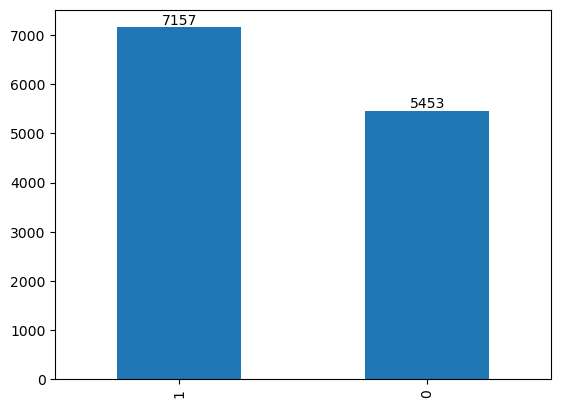

In [75]:
ax=data.Y.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

# Preprocessing

In [88]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0


In [84]:
data.temperature=data.temperature.astype('object')
data.has_children=data.has_children.astype('object')
data.toCoupon_GEQ15min=data.toCoupon_GEQ15min.astype('object')
data.toCoupon_GEQ25min=data.toCoupon_GEQ25min.astype('object')
data.direction_same=data.direction_same.astype('object')
data.direction_opp=data.direction_opp.astype('object')

In [89]:
numcols = data.select_dtypes(include = np.number)
objcols = data.select_dtypes(include = 'object')

In [87]:
objcols.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1


In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
objcols = objcols.astype(str).apply(LabelEncoder().fit_transform)

In [93]:
objcols.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,1,2,4,0,0,0,3,...,3,4,4,0,1,0,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,3,4,4,0,1,0,0,0,0,1
2,1,1,2,2,0,1,1,0,0,3,...,3,4,4,0,1,0,1,0,0,1
3,1,1,2,2,2,2,1,0,0,3,...,3,4,4,0,1,0,1,0,0,1
4,1,1,2,2,2,2,0,0,0,3,...,3,4,4,0,1,0,1,0,0,1


In [94]:
numcols.head()

,Y
0,1
1,0
2,1
3,0
4,0


In [95]:
combine_df = pd.concat([numcols,objcols],axis = 1)

In [96]:
combine_df.head()

,Y,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,1,0,2,1,2,4,0,0,0,...,3,4,4,0,1,0,0,0,0,1
1,0,1,1,2,2,0,2,1,0,0,...,3,4,4,0,1,0,0,0,0,1
2,1,1,1,2,2,0,1,1,0,0,...,3,4,4,0,1,0,1,0,0,1
3,0,1,1,2,2,2,2,1,0,0,...,3,4,4,0,1,0,1,0,0,1
4,0,1,1,2,2,2,2,0,0,0,...,3,4,4,0,1,0,1,0,0,1


In [97]:
y = combine_df.Y
X = combine_df.drop('Y',axis = 1)

# Model building & hyperparameter tuning

In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [110]:
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC()),
    ("k-Nearest Neighbors", KNeighborsClassifier()),
    ("XGB Classifier", xgb.XGBClassifier()),
    ("AdaBoost Classifier", AdaBoostClassifier(n_estimators=100, random_state=0)),
    ("Gradient Boosting Classifier",GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)),
    ("ExtraTrees Classifier",ExtraTreesClassifier(n_estimators=100, random_state=0)),
    ("HistGradientBoosting",HistGradientBoostingClassifier()),
    ("Gaussian NB",GaussianNB())
]

# Iterate through each classifier and evaluate its performance
for name, clf in classifiers:
    # Create a pipeline with standardization and the classifier
    steps = [("scaler", StandardScaler()), ("classifier", clf)]
    model = Pipeline(steps)
    
    # Perform 5-fold cross-validation and calculate accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    
    # Print the mean accuracy and standard deviation
    print(f"{name}:")
    print(f"Mean Accuracy: {np.mean(scores):.2f}")
    print(f"Standard Deviation: {np.std(scores):.2f}\n")

# Train and evaluate the best-performing model on the test set
best_classifier = classifiers[np.argmax([np.mean(cross_val_score(Pipeline([("scaler", StandardScaler()), ("classifier", clf[1])]), X_train, y_train, cv=5, scoring="accuracy")) for clf in classifiers])]
best_model = best_classifier[1]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model ({best_classifier[0]}) Test Accuracy: {test_accuracy:.2f}")

Logistic Regression:
Mean Accuracy: 0.63
Standard Deviation: 0.01

Random Forest:
Mean Accuracy: 0.74
Standard Deviation: 0.01

Support Vector Machine:
Mean Accuracy: 0.68
Standard Deviation: 0.01

k-Nearest Neighbors:
Mean Accuracy: 0.64
Standard Deviation: 0.01

XGB Classifier:
Mean Accuracy: 0.75
Standard Deviation: 0.01

AdaBoost Classifier:
Mean Accuracy: 0.68
Standard Deviation: 0.01

Gradient Boosting Classifier:
Mean Accuracy: 0.68
Standard Deviation: 0.01

ExtraTrees Classifier:
Mean Accuracy: 0.73
Standard Deviation: 0.01

HistGradientBoosting:
Mean Accuracy: 0.75
Standard Deviation: 0.01

Gaussian NB:
Mean Accuracy: 0.61
Standard Deviation: 0.01

Best Model (HistGradientBoosting) Test Accuracy: 0.73


In [117]:
from pycaret.classification import *
s = setup(data = data, target = 'Y', session_id=123)

,Description,Value
0,Session id,123
1,Target,Y
2,Target type,Binary
3,Original data shape,"(12610, 24)"
4,Transformed data shape,"(12610, 109)"
5,Transformed train set shape,"(8827, 109)"
6,Transformed test set shape,"(3783, 109)"
7,Ordinal features,7
8,Categorical features,23
9,Preprocess,True


In [118]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7569,0.8176,0.8200,0.7677,0.7929,0.4994,0.5012,0.5600
rf,Random Forest Classifier,0.7545,0.8197,0.8248,0.7625,0.7923,0.4933,0.4958,0.4800
lightgbm,Light Gradient Boosting Machine,0.7499,0.8200,0.8271,0.7555,0.7895,0.4828,0.4862,0.4330
gbc,Gradient Boosting Classifier,0.7239,0.7827,0.8206,0.7282,0.7714,0.4260,0.4311,0.5840
lr,Logistic Regression,0.6828,0.7343,0.7655,0.7024,0.7324,0.3446,0.3468,1.1850
lda,Linear Discriminant Analysis,0.6826,0.7346,0.7623,0.7033,0.7315,0.3448,0.3467,0.2700
ridge,Ridge Classifier,0.6824,0.0000,0.7637,0.7027,0.7318,0.3442,0.3463,0.1700
ada,Ada Boost Classifier,0.6819,0.7337,0.7713,0.6992,0.7334,0.3414,0.3441,0.3930
dt,Decision Tree Classifier,0.6813,0.6755,0.7196,0.7192,0.7193,0.3507,0.3508,0.2060
svm,SVM - Linear Kernel,0.6582,0.0000,0.7798,0.6771,0.7191,0.2847,0.2990,0.2210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Model Selection

In [111]:
hgb = HistGradientBoostingClassifier()
hgbmodel = hgb.fit(X_train, y_train)

In [112]:
hgbmodel.score(X_train,y_train)

0.8270222045995241

In [113]:
cross_val_score(hgbmodel,X_train,y_train)

array([0.76610505, 0.74727453, 0.75322101, 0.75012395, 0.74318294])

In [114]:
np.mean([0.76610505, 0.74727453, 0.75322101, 0.75012395, 0.74318294])

0.751981496

In [120]:
clf = ExtraTreesClassifier()

In [123]:
extmodel = clf.fit(X_train,y_train)

In [124]:
extmodel.score(X_train,y_train)

0.9991078509119746

In [125]:
cross_val_score(extmodel,X_train,y_train)

array([0.74331021, 0.7210109 , 0.72695738, 0.71839365, 0.71194844])

In [126]:
np.mean([0.74331021, 0.7210109 , 0.72695738, 0.71839365, 0.71194844])

0.724324116

# Model Evaluation

In [115]:
from sklearn.metrics import classification_report,RocCurveDisplay

In [127]:
md_pred = hgbmodel.predict(X_test)

In [131]:
print(classification_report(y_test,md_pred))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1106
           1       0.73      0.82      0.77      1416

    accuracy                           0.73      2522
   macro avg       0.73      0.72      0.72      2522
weighted avg       0.73      0.73      0.73      2522



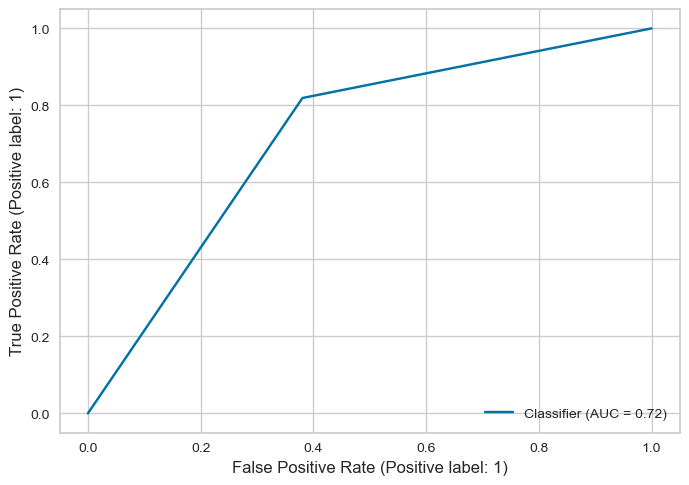

In [132]:
RocCurveDisplay.from_predictions(y_test,md_pred)

In [133]:
ext_pred = extmodel.predict(X_test)

In [134]:
print(classification_report(y_test,ext_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      1106
           1       0.73      0.78      0.76      1416

    accuracy                           0.72      2522
   macro avg       0.71      0.71      0.71      2522
weighted avg       0.72      0.72      0.72      2522



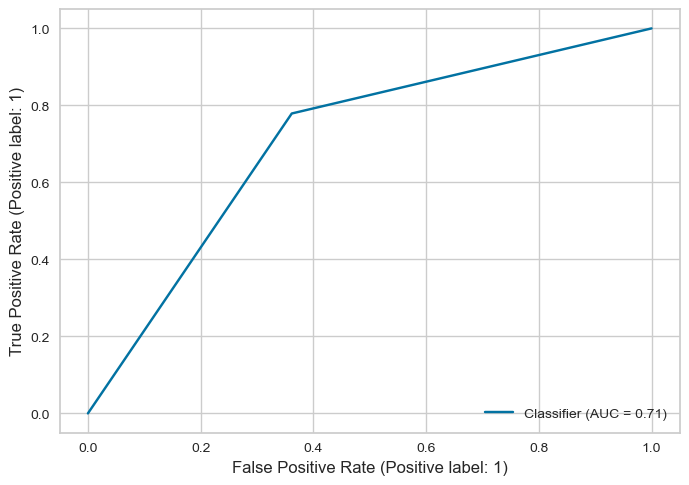

In [135]:
RocCurveDisplay.from_predictions(y_test,ext_pred)

# Pickling

In [136]:
import pickle

In [137]:
pickle.dump(hgb,open('hgb.pkl','wb'))

In [138]:
pickle_model = pickle.load(open('hgb.pkl','rb'))